# 决策树

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.datasets import load_iris,load_diabetes
import warnings
warnings.filterwarnings("ignore")

### 决策树必须要指定树的深度,否则非常容易过拟合

In [17]:
data=load_iris()
X=data['data'][:,(2,3)]
y=data['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [16]:
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [18]:

DTC=DecisionTreeClassifier(max_depth=3)
DTC.fit(X_train,y_train)
DTC.score(X_test,y_test)

1.0

In [20]:
from sklearn.tree import export_graphviz

export_graphviz(
    DTC,
    out_file="./iris_tree.dot",
    feature_names=data.feature_names,
    class_names=data.target_names,
    rounded=True,
    filled=True
)

TypeError: list indices must be integers or slices, not tuple

在命令行执行以下命令转为png格式

dot -Tpng iris_tree.dot -o iris_tree.png

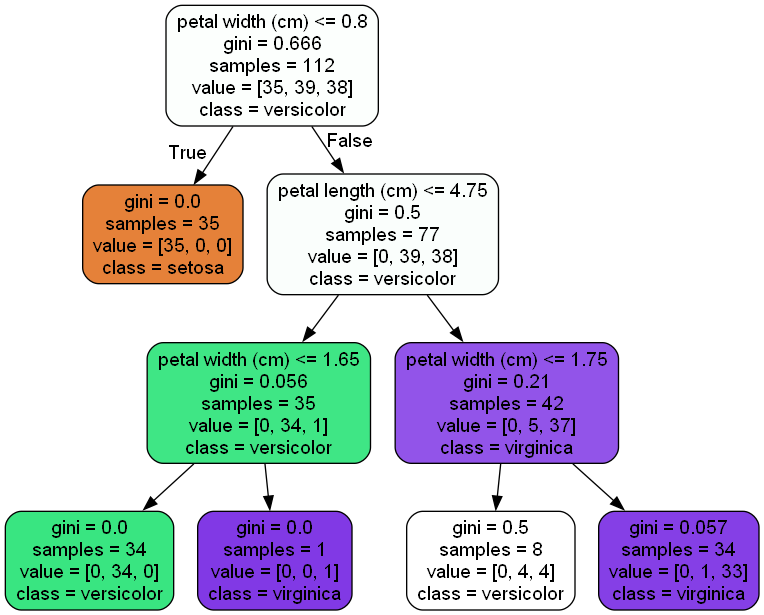

In [11]:
from IPython.display import Image
Image(filename='iris_tree.png',width=600,height=600)

In [30]:
min(X[:,1])

0.1

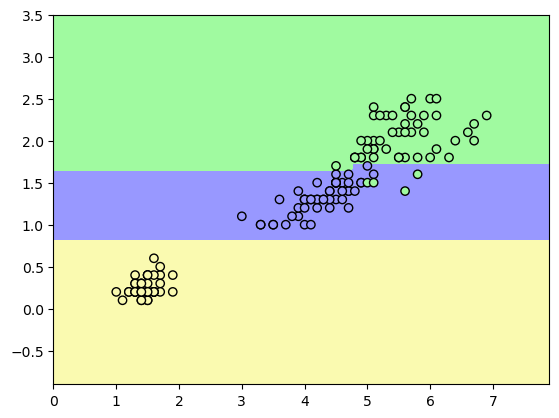

In [33]:
x_min,x_max=min(X[:,0])-1,max(X[:,0])+1
y_min,y_max=min(X[:,1])-1,max(X[:,1])+1
x0,x1=np.meshgrid(
    np.linspace(x_min,x_max,100),
    np.linspace(y_min,y_max,100)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
zz=DTC.predict(X_new)
zz=zz.reshape(x0.shape)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

cs=plt.contourf(x0,x1,zz,cmap=custom_cmap)
plt.scatter(X[:,0],X[:,1],c=y,cmap=custom_cmap,edgecolors='k')
plt.show()

## 决策树中的正则化
**DecisionTreeClassifier类**还有一些其他参数类似地限制了决策树的形状：

* min_samples_split（节点在分割之前必须具有的最小样本数），

* min_samples_leaf（叶子节点必须具有的最小样本数），

* max_leaf_nodes（叶子节点的最大数量），

* max_features（在每个节点处评估用于拆分的最大特征数）。

* max_depth(树最大的深度)

In [40]:
def plot_decision_boundary(model,X,y):
    x_min,x_max=min(X[:,0])-1,max(X[:,0])+1
    y_min,y_max=min(X[:,1])-1,max(X[:,1])+1
    x0,x1=np.meshgrid(
        np.linspace(x_min,x_max,100),
        np.linspace(y_min,y_max,100)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    zz=model.predict(X_new)
    zz=zz.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

    cs=plt.contourf(x0,x1,zz,cmap=custom_cmap)
    plt.scatter(X[:,0],X[:,1],c=y,cmap=custom_cmap,edgecolors='k')
    # plt.show()

In [34]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.25,random_state=53)
X.shape

(100, 2)

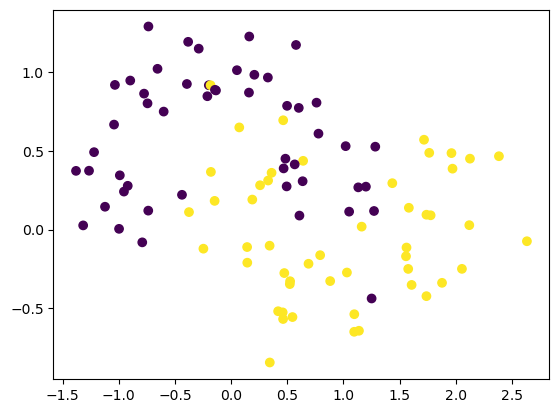

In [56]:
plt.scatter(X[:,0],X[:,1],c=y)

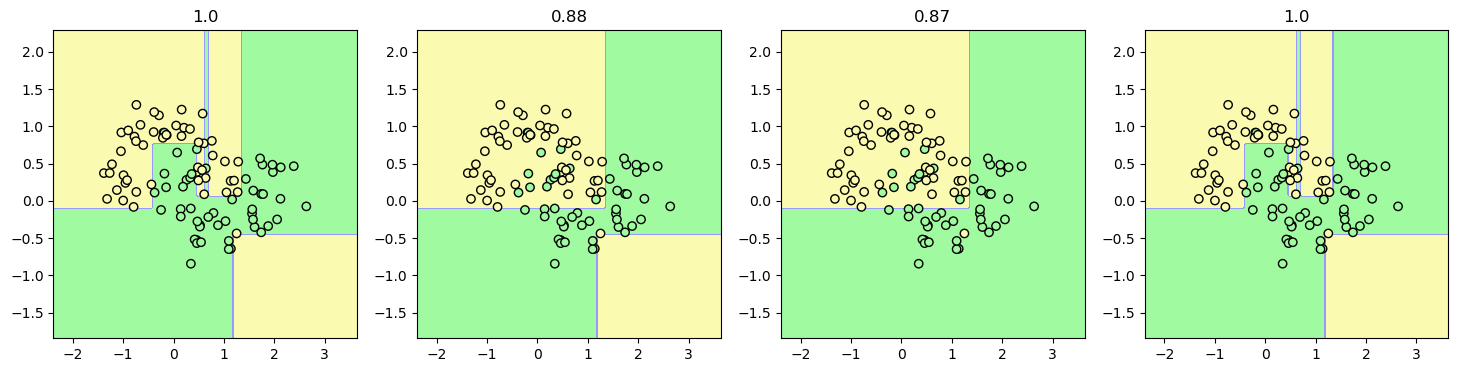

In [60]:
#图一和图四可能会造成过拟合
dt_clf1=DecisionTreeClassifier(min_samples_split=3,random_state=42)
dt_clf2=DecisionTreeClassifier(max_depth=3,random_state=42)
dt_clf3=DecisionTreeClassifier(max_depth=2,random_state=42)
dt_clf4=DecisionTreeClassifier(max_depth=1000,random_state=42)
dt_clf1.fit(X,y)
dt_clf2.fit(X,y)
dt_clf3.fit(X,y)
dt_clf4.fit(X,y)

plt.figure(figsize=(18,4))
plt.subplot(141)
plot_decision_boundary(dt_clf1,X,y)
plt.title(dt_clf1.score(X,y))

plt.subplot(142)
plot_decision_boundary(dt_clf2,X,y)
plt.title(dt_clf2.score(X,y))

plt.subplot(143)
plot_decision_boundary(dt_clf3,X,y)
plt.title(dt_clf3.score(X,y))

plt.subplot(144)
plot_decision_boundary(dt_clf4,X,y)
plt.title(dt_clf4.score(X,y))
plt.show()

## 回归树

In [107]:
#生成数据
np.random.seed(42)
m=200
X=np.random.rand(m,1)
y = 4*(X-0.5)**2
y = y + np.random.randn(m,1)/10

In [108]:
y.shape

(200, 1)

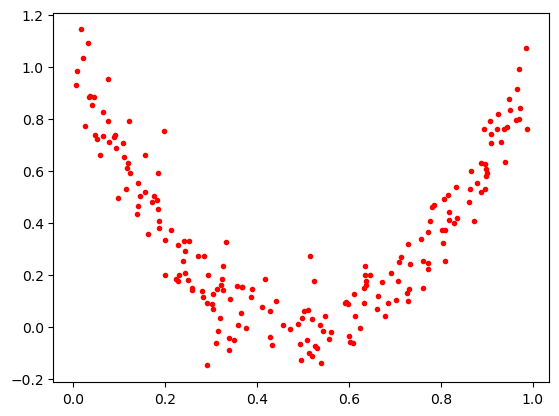

In [109]:
plt.plot(X,y,'r.')

In [110]:
dt_reg=DecisionTreeRegressor(max_depth=3)
dt_reg.fit(X,y)
dt_reg.score(X,y)

0.886898947978226

In [111]:
import graphviz

dot_data = export_graphviz(
        dt_reg,
        out_file=("./regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )


### 对比树深度的影响

In [116]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=4,min_samples_split=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)
x1=np.linspace(0,1,200).reshape(-1,1)
y_pred1=tree_reg1.predict(x1)
y_pred2=tree_reg2.predict(x1)

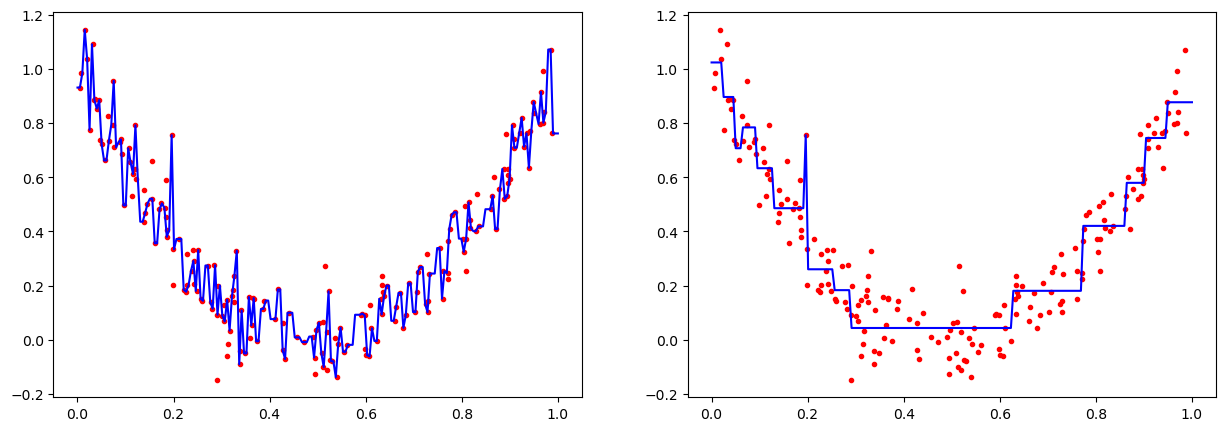

In [117]:
#图一出现过拟合风险
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(X,y,'r.')
plt.plot(x1,y_pred1,'b')
plt.subplot(122)
plt.plot(X,y,'r.')
plt.plot(x1,y_pred2,'b')
plt.show()

In [96]:
#实例数据
data=load_diabetes()
X=data['data']
y=data['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [97]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X_train, y_train)
tree_reg2.fit(X_train, y_train)

y_pred1=tree_reg1.predict(X_test)
y_pred2=tree_reg2.predict(X_test)

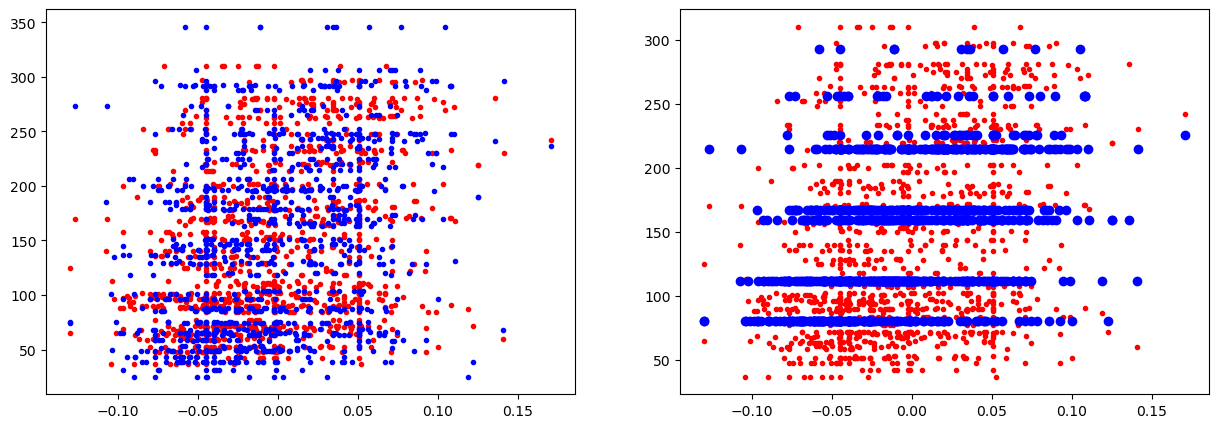

In [103]:
#图一出现过拟合风险
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_pred1,'b.')
plt.subplot(122)
plt.plot(X_test,y_test,'r.')
plt.plot(X_test,y_pred2,'bo')
plt.show()